Importing the dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and processing

In [3]:
#loading the csv data into pandas Dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#printing the last five values
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [10]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [12]:
correlation = gold_data.drop(columns=['Date'],axis=True).corr()

<Axes: >

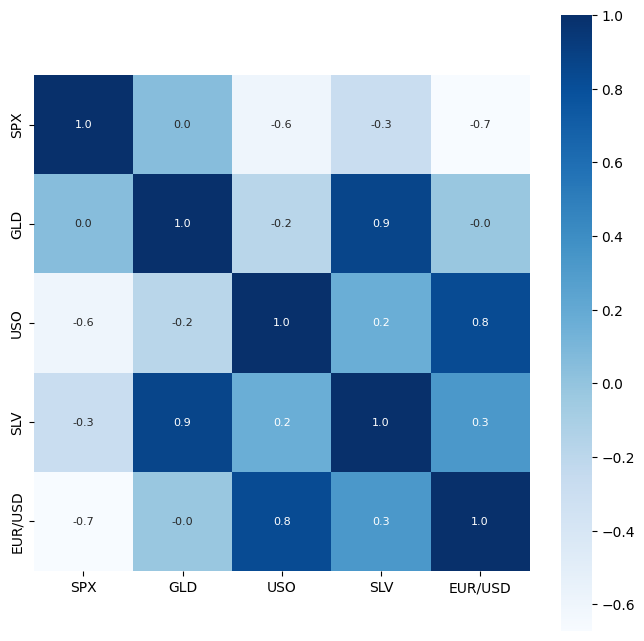

In [14]:
#constructing a heatmap to understand the corelation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt = '.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [15]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


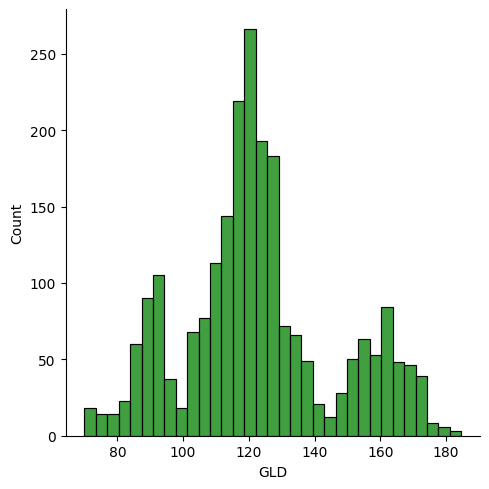

In [16]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'],color='green')

Splitting the features and Target

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [24]:
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.52369979  82.0425999  116.24720085 127.65070067 120.76570116
 154.71469768 150.05549815 126.11230025 117.55839854 126.08140076
 116.5746013  171.11230087 141.72679751 167.75269868 115.22139994
 117.74660059 139.72970153 170.07800085 158.61400262 160.39289889
 155.11100073 124.8937003  175.62830058 157.15930334 125.19060035
  93.87599953  77.03420044 120.42520028 119.11859942 167.49719949
  88.24370029 125.11780003  91.04210097 117.73140021 121.22319872
 136.00180092 115.29730125 115.12190061 147.23389907 107.30930094
 104.38850247  87.40949813 126.50500024 117.89609996 153.01429934
 119.35830036 108.35679993 108.07739831  93.21190042 127.08839776
  75.25450013 113.66159939 121.04270026 111.19259932 118.79419884
 120.99599944 159.17430091 166.54000135 146.80549665  85.9341988
  94.20610036  86.87109864  90.61260015 118.93690091 126.40290039
 127.59250011 169.86949906 122.19509924 117.32139885  98.55690023
 168.24480165 143.15409891 132.21750328 121.16160224 121.26119952
 119.638000

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9894940075759403


Compare the Actual Values and Predicted Values in a Plot

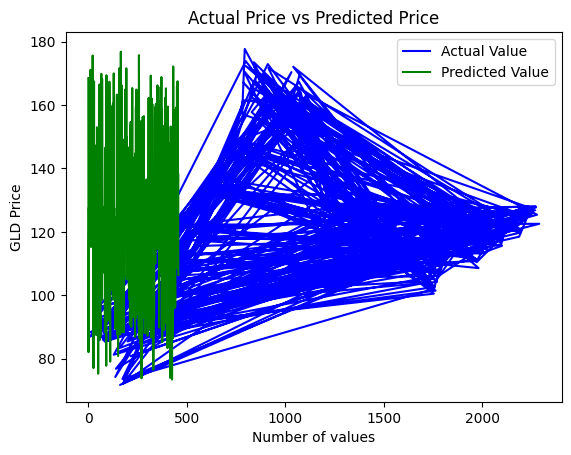

In [29]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color = 'green' , label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()